In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
%matplotlib inline

In [2]:
from sklearn.neural_network import MLPRegressor
from sklearn.cross_validation import train_test_split

/Users/ruizhao/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
from sklearn.cross_validation import KFold

In [3]:
"""
Read in train and test as Pandas DataFrames
"""
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [4]:
df_train.head()

,smiles,feat_001,feat_002,feat_003,feat_004,feat_005,feat_006,feat_007,feat_008,feat_009,...,feat_248,feat_249,feat_250,feat_251,feat_252,feat_253,feat_254,feat_255,feat_256,gap
0,c1ccc(o1)-c1ccc(s1)-c1cnc(-c2scc3[se]ccc23)c2n...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.19
1,C1=CC=C(C1)c1cc2ncc3c4[SiH2]C=Cc4ncc3c2c2=C[Si...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.60
2,[nH]1c-2c([SiH2]c3cc(-c4scc5C=CCc45)c4nsnc4c-2...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.49
3,[nH]1c2-c3occc3Cc2c2c1cc(-c1cccc3=C[SiH2]C=c13...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.36
4,c1cnc2c3oc4cc(-c5ncncn5)c5nsnc5c4c3c3cocc3c2c1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.98


In [5]:
df_test.head()

,Id,smiles,feat_001,feat_002,feat_003,feat_004,feat_005,feat_006,feat_007,feat_008,...,feat_247,feat_248,feat_249,feat_250,feat_251,feat_252,feat_253,feat_254,feat_255,feat_256
0,1,c1sc(-c2cnc3c(c2)c2nsnc2c2cc4cccnc4cc32)c2cc[n...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,[nH]1cccc1-c1cc2c3nsnc3c3c4sccc4[nH]c3c2s1,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,[nH]1c2cc(-c3ccc[se]3)c3nsnc3c2c2c3cscc3c3ccc4...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,[nH]1c(cc2cnc3c(c12)c1=C[SiH2]C=c1c1ccc2=CCC=c...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,c1sc(-c2sc(-c3sc(-c4scc5[se]ccc45)c4ccoc34)c3c...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#store gap values
Y_train = df_train.gap.values
#row where testing examples start
test_idx = df_train.shape[0]
#delete 'Id' column
df_test = df_test.drop(['Id'], axis=1)
#delete 'gap' column
df_train = df_train.drop(['gap'], axis=1)

In [7]:
#DataFrame with all train and test examples so we can more easily apply feature engineering on
df_all = pd.concat((df_train, df_test), axis=0)
df_all.head()

,smiles,feat_001,feat_002,feat_003,feat_004,feat_005,feat_006,feat_007,feat_008,feat_009,...,feat_247,feat_248,feat_249,feat_250,feat_251,feat_252,feat_253,feat_254,feat_255,feat_256
0,c1ccc(o1)-c1ccc(s1)-c1cnc(-c2scc3[se]ccc23)c2n...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,C1=CC=C(C1)c1cc2ncc3c4[SiH2]C=Cc4ncc3c2c2=C[Si...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,[nH]1c-2c([SiH2]c3cc(-c4scc5C=CCc45)c4nsnc4c-2...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,[nH]1c2-c3occc3Cc2c2c1cc(-c1cccc3=C[SiH2]C=c13...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,c1cnc2c3oc4cc(-c5ncncn5)c5nsnc5c4c3c3cocc3c2c1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df_train.shape

(1000000, 257)

In [9]:
Y_train

array([ 1.19,  1.6 ,  1.49, ...,  2.03,  1.74,  1.72])

In [9]:
# Drop the 'smiles' column
# df_all = df_all.drop(['smiles'], axis=1)
# vals = df_all.values
# X_train = vals[:test_idx]
# X_test = vals[test_idx:]
# print "Train features:", X_train.shape
# print "Train gap:", Y_train.shape
# print "Test features:", X_test.shape

Train features: (1000000, 256)
Train gap: (1000000,)
Test features: (824230, 256)


In [10]:
df_train = df_train.drop(['smiles'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(df_train, Y_train, test_size=0.4, random_state=42)
x_train = x_train.values
x_test = x_test.values

In [11]:
print x_train.shape
print x_test.shape
print y_train.shape
print y_test.shape

(600000, 256)
(400000, 256)
(600000,)
(400000,)


In [12]:
def RMSE(y, y_hat):
    result = np.sqrt((np.sum((y-y_hat)**2))/y.shape[0])
    return result

In [9]:
from sklearn import svm
clf = svm.SVR(kernel='linear')
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

In [2]:
#cross validation to find the best regulization parameter
from sklearn.linear_model import Ridge as Ridge_Reg
from sklearn.linear_model import Lasso as Lasso_Reg
from sklearn.cross_validation import KFold
L_score = []
R_score = []
kf = KFold(n = x_train.shape[0], n_folds=5)

regularization = 10.**np.arange(-10, 10)
for c in regularization:
    lasso_score = []
    ridge_score = []
    lasso_reg = Lasso_Reg(alpha = c)
    ridge_reg = Ridge_Reg(alpha = c)
    for train_index, test_index in kf:
        train_x, test_x = x_train[train_index], x_train[test_index]
        train_y, test_y = y_train[train_index], y_train[test_index]
        lasso_reg.fit(train_x, train_y)
        ridge_reg.fit(train_x, train_y)
        lasso_score.append(lasso_reg.score(test_x,test_y))
        ridge_score.append(ridge_reg.score(test_x,test_y))
    L_score.append(np.average(lasso_score))
    R_score.append(np.average(ridge_score))

In [ ]:
# #print L_score
# print "The max score happens at",regularization[L_score.index(max(L_score))],"with score of", max(L_score)
# #print R_score
# print "The max score happens at",regularization[R_score.index(max(R_score))],"with score of", max(R_score)

In [ ]:
#df_train_0 = df_train.loc[:, (df_train != 0).any(axis=0)]

In [ ]:
#df_train_0.shape[1]

In [ ]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_train_0, Y_train, test_size=0.4, random_state=42)
x_train = x_train.values
x_test = x_test.values

In [16]:
from sklearn import tree
DT_score = []
DT_RMSE = []
kf = KFold(n = len(x_train), n_folds=5)
for c in range(1,100):
    dt_score = []
    dt_RMSE = []
    clf = tree.DecisionTreeRegressor(max_depth=c)
    for train_index, test_index in kf:
        train_x, test_x = x_train[train_index], x_train[test_index]
        train_y, test_y = y_train[train_index], y_train[test_index]
        clf.fit(train_x, train_y)
        dt_score.append(clf.score(test_x, test_y))
        dt_RMSE.append(RMSE(test_y, clf.predict(test_x)))
    DT_score.append(np.average(dt_score))
    DT_RMSE.append(np.average(dt_RMSE))

In [29]:
print "The max score happens at", DT_score.index(min(DT_score)), "with score of", max(DT_score)
print "The min score happens at", DT_RMSE.index(min(DT_RMSE)), "with score of", min(DT_RMSE)

The max score happens at 44 with score of 0.551553547931
The min score happens at 44 with score of 0.272612505113


<function matplotlib.pyplot.show>

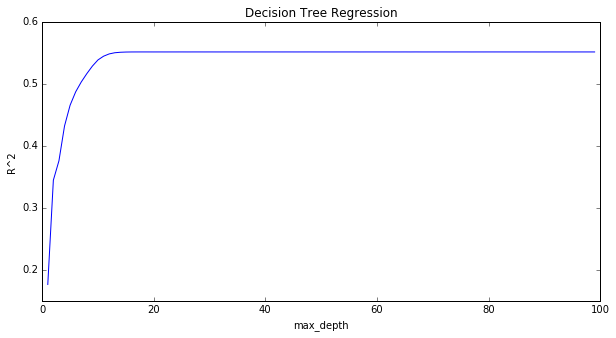

In [24]:
plt.figure(figsize=(10,5))
plt.plot(range(1,100), DT_score, color = "blue")
plt.xlabel("max_depth")
plt.ylabel("R^2")
plt.title("Decision Tree Regression")
plt.show

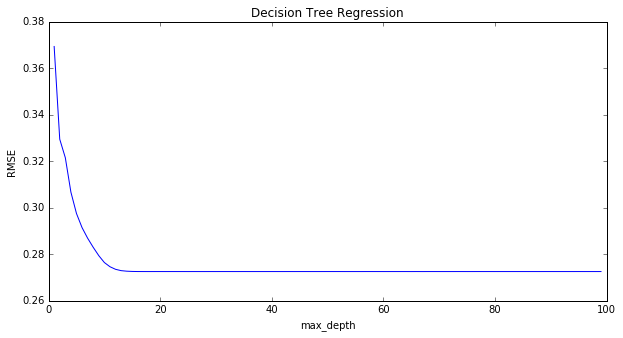

In [25]:
plt.figure(figsize=(10,5))
plt.plot(range(1,100), DT_RMSE, color = "blue")
plt.xlabel("max_depth")
plt.ylabel("RMSE")
plt.title("Decision Tree Regression")

In [33]:
lr = linear_model.LinearRegression()
lr.fit(x_train, y_train)  
lrscore = lr.score(x_test, y_test)
lrrmse = RMSE(test_y, lr.predict(test_x))

In [34]:
print lrscore 
print lrrmse

0.460091030715
0.2995704321


In [36]:
from sklearn import ensemble

In [38]:
rf = ensemble.RandomForestRegressor()
rf.fit(x_train, y_train)
rfscore = rf.score(x_test, y_test)
rfrmse = RMSE(test_y, rf.predict(test_x))

In [40]:
print rfscore 
print rfrmse

0.550752304191
0.272420392868


In [14]:
from sklearn.ensemble import GradientBoostingRegressor
GB_score = []
kf = KFold(n = len(x_train), n_folds=5)
for c in range(1,10):
    print c
    gb_score = []
    est = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1,
     max_depth= c, random_state=0, loss='ls')
    for train_index, test_index in kf:
        train_x, test_x = x_train[train_index], x_train[test_index]
        train_y, test_y = y_train[train_index], y_train[test_index]
        est.fit(train_x, train_y)
        gb_score.append(est.score(test_x, test_y))
    GB_score.append(np.average(gb_score))
print "The max score happens at", GB_score.index(max(GB_score)), "with score of", max(GB_score)

1
2
3
4
5
6
7
8
9
The max score happens at 8 with score of 0.549782262164


In [21]:
est = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1,
     max_depth= 2, random_state=0, loss='ls')
df_test = df_test.drop(['smiles'], axis=1)
est.fit(df_train, Y_train)
y_hat = est.predict(df_test)

In [26]:
def write_to_file(filename, predictions):
    with open(filename, "w") as f:
        f.write("Id,Prediction\n")
        for i,p in enumerate(predictions):
            f.write(str(i+1) + "," + str(p) + "\n")

In [23]:
write_to_file("sample1.csv", y_hat)

In [1]:
from rdkit import Chem

In [17]:
mlp = MLPRegressor(solver='lbfgs', alpha=1e-5)
mlp.fit(x_train, y_train)  
mlpscore = mlp.score(x_test, y_test)

In [18]:
mlpscore

0.53928050488520984

In [21]:
df_test = df_test.drop(['smiles'], axis=1)

In [22]:
df_test.shape

(824230, 256)

In [23]:
y_hat = mlp.predict(df_test)

In [25]:
y_hat

array([ 1.45109459,  1.66262333,  1.60965683, ...,  1.45109459,
        1.49880194,  1.81531504])

In [27]:
write_to_file("neural_network.csv", y_hat)

In [33]:
np.sqrt(y_hat)

array([ 1.20461388,  1.28942752,  1.26872252, ...,  1.20461388,
        1.22425567,  1.34733628])

In [37]:
RMSE(y_test, mlp.predict(x_test))

0.27646120933386203